### Topic :- Drug detection and analysis

In [2]:
import pandas as pd
import numpy as np
import random
import math
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [3]:
df1 = pd.read_csv('drugs1.csv')
df2 = pd.read_csv('drugs2.csv')

In [4]:
df1.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"PTSD's Disease, Maintenance","""My son has PTSD&#039;s disease and has done v...",8,17-May-09,17
2,97013,Ambien,Insomnia,"""Ditto on rebound sleepless when discontinued....",2,13-Jan-15,44
3,159672,Bactrim,Anxiety,"""Quick reduction of symptoms""",9,29-Sep-17,3
4,97768,Cyclafem 1 / 35,Autism,"""I have been on this Autism for one cycle. Aft...",9,22-Oct-15,4


In [5]:
df2.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,132258,Ativan,Panic Disorder,"""Honestly, I have been taking ativan for 2 yea...",6,01-Jun-15,47
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Autism,"""I used to take another Depression Medicine, w...",5,14-Dec-09,17
3,29607,Topiramate,Migraine Prevention,"""I have been on this medication almost two wee...",9,01-Jan-15,19
4,138000,Ortho Evra,Autism,"""This is my first time using any form of Autis...",8,03-Nov-15,10


In [6]:
# Combining drugs1 and drugs2 for better analysis
data = pd.concat([df1, df2])
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"PTSD's Disease, Maintenance","""My son has PTSD&#039;s disease and has done v...",8,17-May-09,17
2,97013,Ambien,Insomnia,"""Ditto on rebound sleepless when discontinued....",2,13-Jan-15,44
3,159672,Bactrim,Anxiety,"""Quick reduction of symptoms""",9,29-Sep-17,3
4,97768,Cyclafem 1 / 35,Autism,"""I have been on this Autism for one cycle. Aft...",9,22-Oct-15,4


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213645 entries, 0 to 159884
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     213645 non-null  int64 
 1   drugName     213645 non-null  object
 2   condition    213350 non-null  object
 3   review       213645 non-null  object
 4   rating       213645 non-null  int64 
 5   date         213645 non-null  object
 6   usefulCount  213645 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.0+ MB


In [8]:
data.describe()

,uniqueID,rating,usefulCount
count,213645.000000,213645.000000,213645.000000
mean,116050.525971,6.992310,28.115158
std,67009.021353,3.275509,36.406271
min,0.000000,1.000000,0.000000
25%,58114.000000,5.000000,6.000000
50%,115920.000000,8.000000,16.000000
75%,173991.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [9]:
data.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

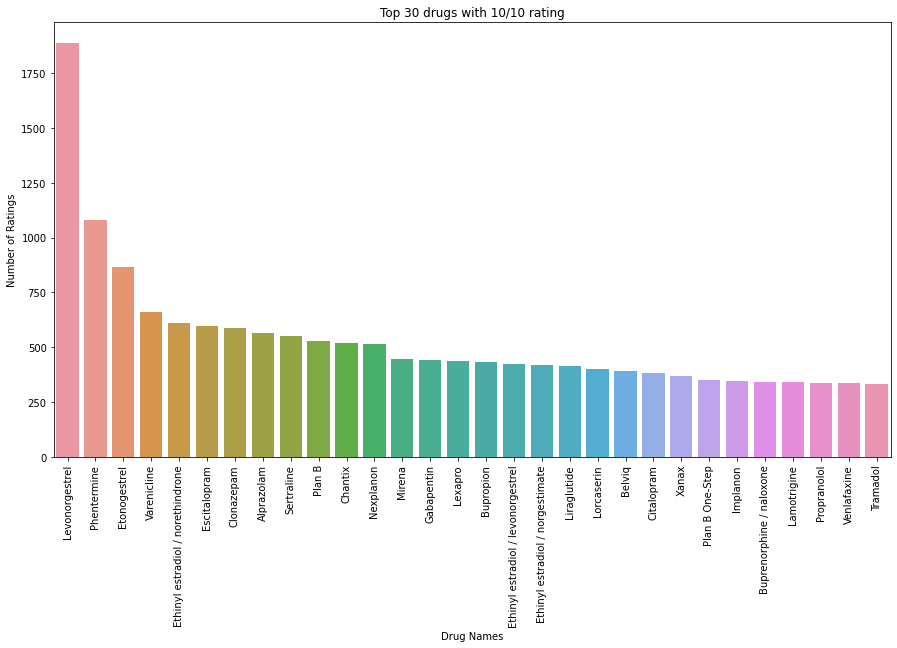

In [10]:
# barplot shows the top 30 drugs with the 10/10 rating

plt.figure(figsize=(15,8))
# data.loc[data.rating == 10]
# data.loc[data.rating == 10, "drugName"]

rating = dict(data.loc[data.rating == 10, "drugName"].value_counts()) 
#value_counts -> returns unique values with dict
drugname = list(rating.keys())
drug_rating = list(rating.values())

#data.loc[0,0]
# print(rating)
# print(drugname)
# print(drug_rating)

drug_rating_plot = sns.barplot(x = drugname[0:30], y = drug_rating[0:30])

drug_rating_plot.set_title('Top 30 drugs with 10/10 rating')
drug_rating_plot.set_ylabel("Number of Ratings")
drug_rating_plot.set_xlabel("Drug Names")
drug_rating_plot.set_xticklabels(drug_rating_plot.get_xticklabels(),rotation = 90)
plt.show()

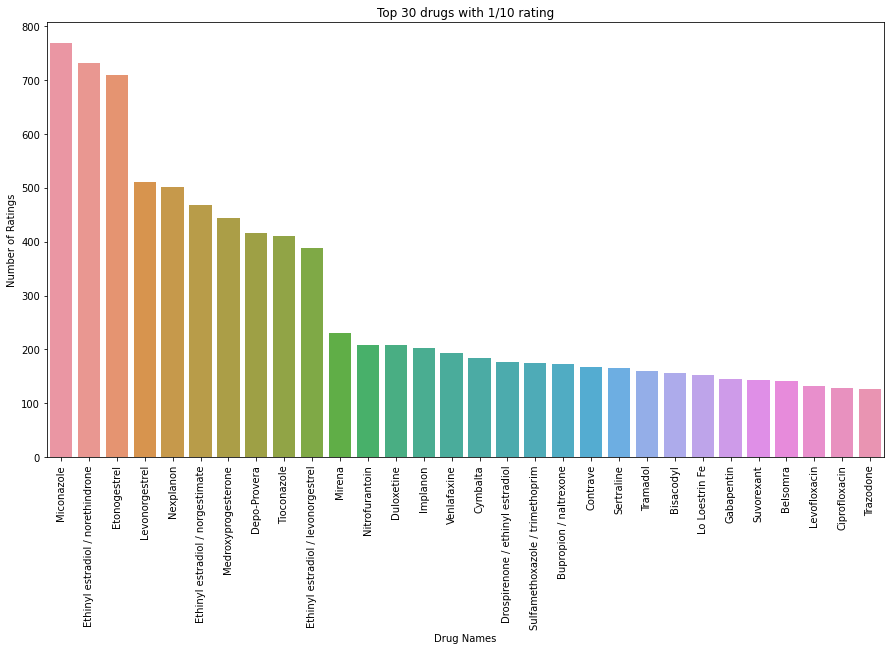

In [11]:
# barplot shows the Top 30 drugs with the 1/10 rating

plt.figure(figsize=(15,8))

rating = dict(data.loc[data.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

drug_rating_plot = sns.barplot(x = drugname[0:30], y = drug_rating[0:30])

drug_rating_plot.set_title('Top 30 drugs with 1/10 rating')
drug_rating_plot.set_ylabel("Number of Ratings")
drug_rating_plot.set_xlabel("Drug Names")
drug_rating_plot.set_xticklabels(drug_rating_plot.get_xticklabels(),rotation = 90)
plt.show()

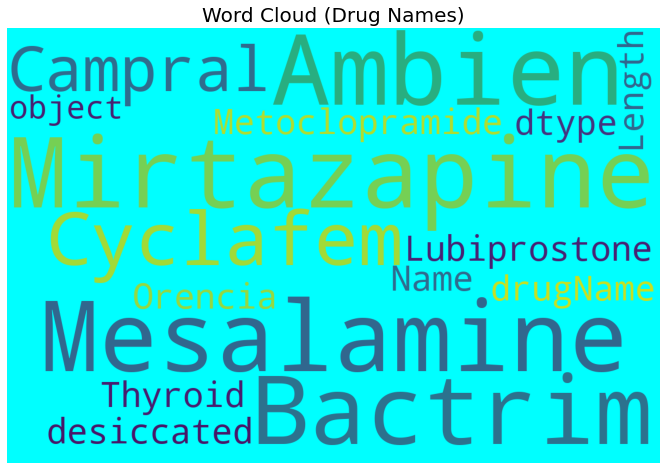

In [13]:
# most popular drugs

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'cyan', width = 1200, height = 800).generate(str(data['drugName']))

plt.figure(figsize=(15,8))
plt.title('Word Cloud (Drug Names)', fontsize = 20)
plt.axis('off') # for displaying only the line
plt.imshow(wordcloud)
plt.show()

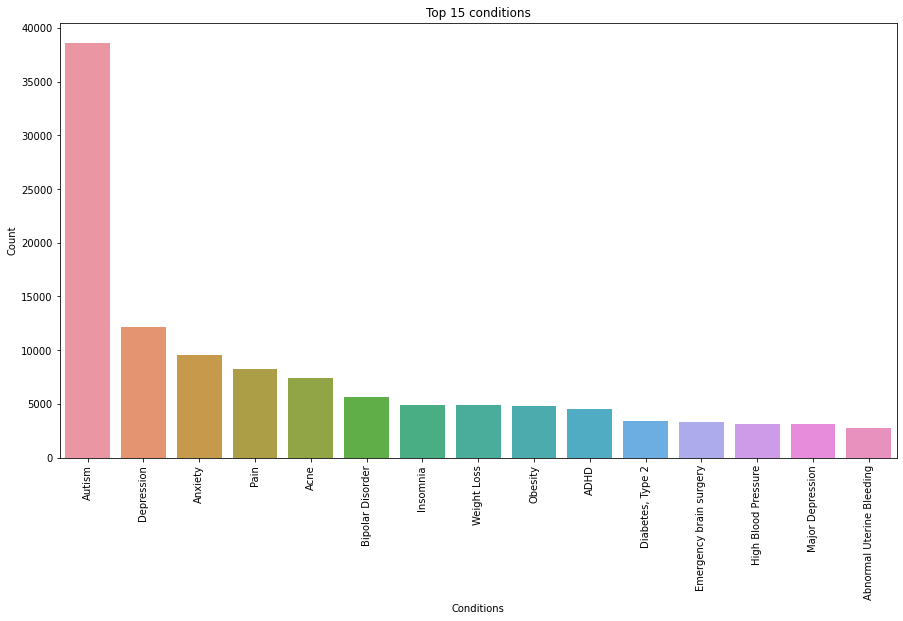

In [12]:
# barplot show the top 15 conditions the people are suffering

plt.figure(figsize=(15,8))

conditions = dict(data['condition'].value_counts())
condition_name = list(conditions.keys())
values = list(conditions.values())

top_conditions_plot = sns.barplot(x = condition_name[0:15], y = values[0:15])
top_conditions_plot.set_title("Top 15 conditions")
top_conditions_plot.set_xlabel("Conditions")
top_conditions_plot.set_ylabel("Count");
top_conditions_plot.set_xticklabels(top_conditions_plot.get_xticklabels(),rotation = 90)
plt.show()

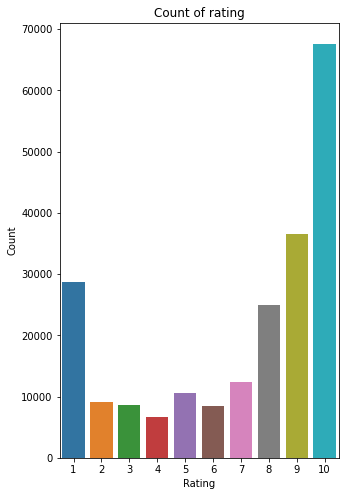

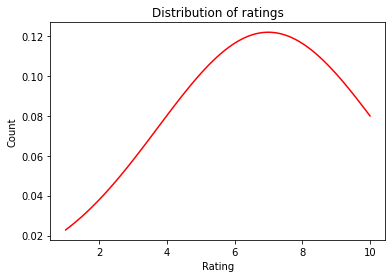

In [14]:
# countplot of the ratings  

plt.figure(figsize=(5,8))

rating = dict(data['rating'].value_counts())
rating_number = list(rating.keys())
rating_count = list(rating.values())
rating_count_plot = sns.barplot(x = rating_number, y = rating_count)

rating_count_plot.set_title('Count of rating')
rating_count_plot.set_ylabel("Count")
rating_count_plot.set_xlabel("Rating")
rating_count_plot.set_xticklabels(rating_count_plot.get_xticklabels())
plt.show()

#the distribution of the ratings

ratings = data['rating']
mean = np.mean(ratings)
std = np.std(ratings)

x = np.linspace(min(ratings), max(ratings), 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y, color='red')
plt.title("Distribution of ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

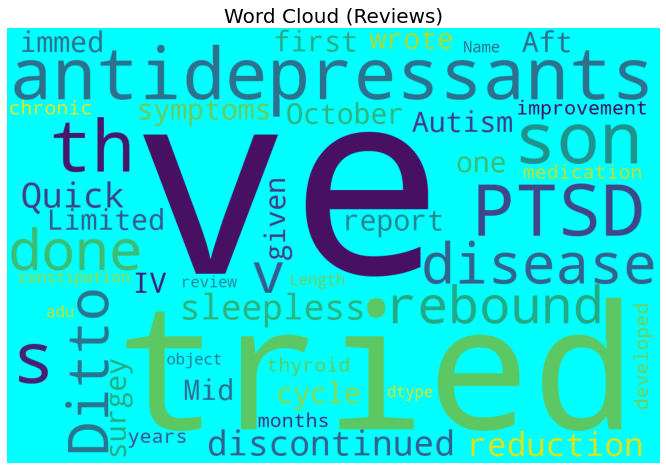

In [22]:
# Wordcloud for reviews

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'cyan', width = 1200, height = 800).generate(str(data['review']))

plt.figure(figsize=(15,8))
plt.title('Word Cloud (Reviews)', fontsize = 20)
plt.axis('off') # for displaying only the line
plt.imshow(wordcloud)
plt.show()

In [15]:
# adding new column of name Review Sentiment (1 if rating is g.t.e to 5 and 0 if rating l.t 5)

data.loc[(data['rating'] >= 5), 'Review Sentiment'] = 1
data.loc[(data['rating'] < 5), 'Review Sentiment'] = 0

data['Review Sentiment'].value_counts()

Review Sentiment
1.0    160477
0.0     53168
Name: count, dtype: int64

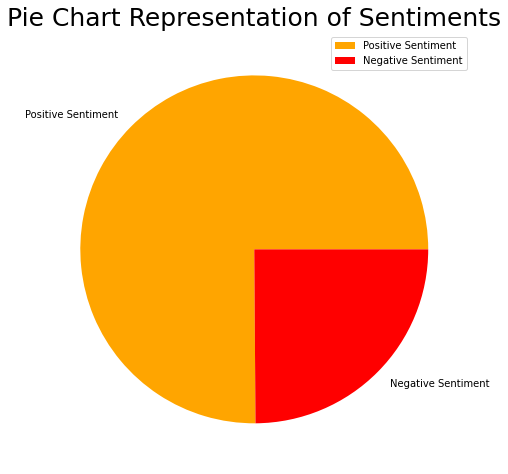

In [16]:
# Pie chart representation for positive and negative sentiments

size = [160477, 53168]
colors = ['orange', 'red']
labels = "Positive Sentiment","Negative Sentiment"

plt.figure(figsize=(15,8))
plt.pie(size, colors = colors, labels = labels)
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

In [17]:
# converting the date into datetime format
data['date'] = pd.to_datetime(data['date'])

# adding year, month and day  
data['Year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

C:\Users\Keyur\AppData\Local\Temp\ipykernel_28448\3264849359.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])


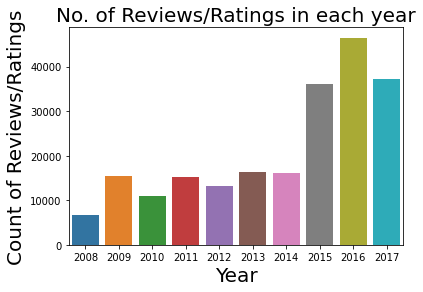

In [18]:
# no. of reviews/rating in each year

rating_review = dict(data['Year'].value_counts())
rating_review_year = list(rating_review.keys())
rating_review_count = list(rating_review.values())

rating_review_count_plot = sns.barplot(x = rating_review_year, y = rating_review_count)
rating_review_count_plot.set_title('No. of Reviews/Ratings in each year',fontsize=20)
rating_review_count_plot.set_ylabel("Count of Reviews/Ratings",fontsize=20)
rating_review_count_plot.set_xlabel("Year",fontsize=20)
rating_review_count_plot.set_xticklabels(rating_review_count_plot.get_xticklabels())

plt.show()

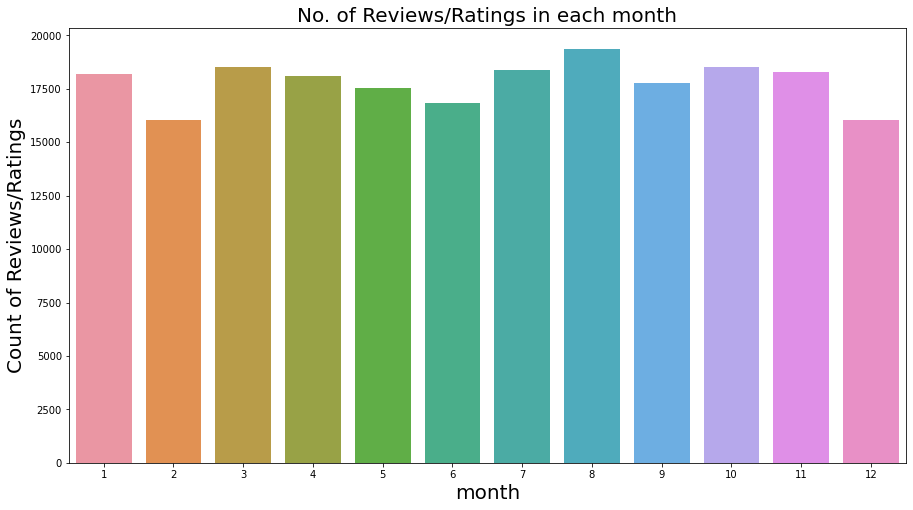

In [19]:
# no. of reviews/rating in each month

plt.figure(figsize=(15,8))
rating_review = dict(data['month'].value_counts())
rating_review_month = list(rating_review.keys())
rating_review_count = list(rating_review.values())

rating_review_count_plot = sns.barplot(x = rating_review_month, y = rating_review_count)
rating_review_count_plot.set_title('No. of Reviews/Ratings in each month',fontsize=20)
rating_review_count_plot.set_ylabel("Count of Reviews/Ratings",fontsize=20)
rating_review_count_plot.set_xlabel("month",fontsize=20)
rating_review_count_plot.set_xticklabels(rating_review_count_plot.get_xticklabels())

plt.show()

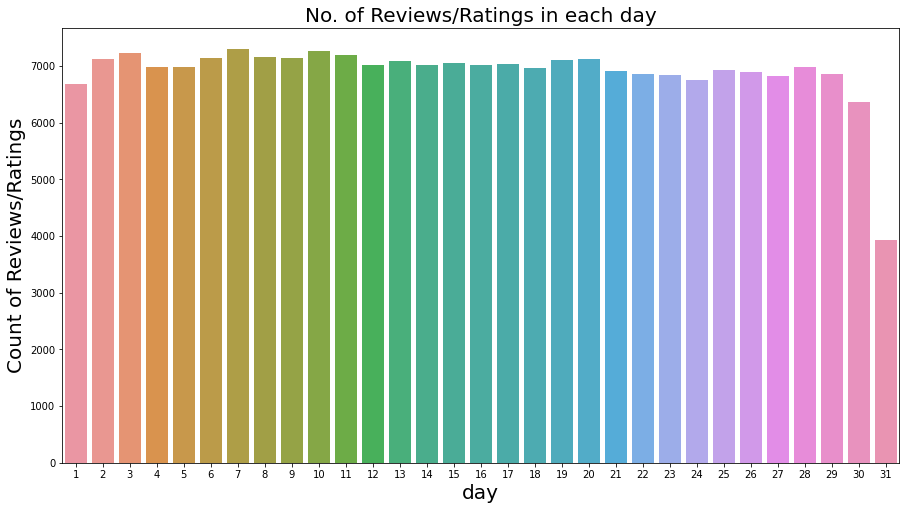

In [20]:
# no. of reviews/rating in each day

plt.figure(figsize=(15,8))
rating_review = dict(data['day'].value_counts())
rating_review_day = list(rating_review.keys())
rating_review_count = list(rating_review.values())

rating_review_count_plot = sns.barplot(x = rating_review_day, y = rating_review_count)
rating_review_count_plot.set_title('No. of Reviews/Ratings in each day',fontsize=20)
rating_review_count_plot.set_ylabel("Count of Reviews/Ratings",fontsize=20)
rating_review_count_plot.set_xlabel("day",fontsize=20)
rating_review_count_plot.set_xticklabels(rating_review_count_plot.get_xticklabels())

plt.show()

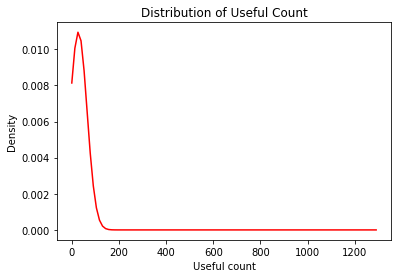

In [21]:
# Distribution for useFulcount
usefulcount = data['usefulCount']
mean = statistics.mean(usefulcount)
std = statistics.stdev(usefulcount)

x = np.linspace(min(usefulcount), max(usefulcount), 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y, color='red')
plt.title("Distribution of Useful Count")
plt.xlabel("Useful count")
plt.ylabel("Density")
plt.show()


In [22]:
# Function for cleaning the reviews to remove unnecessary words or characters from reviews

def review_clean(review): 
    reviewclean = review.str.lower()
    # Replacing the repeating pattern (&#039);
    reviewclean = reviewclean.str.replace("&#039;", "")
    
    # Removing all the special Characters
    reviewclean = reviewclean.str.replace(r'[^\w\d\s]',' ',regex=True)
    
    # Removing all the non ASCII characters
    reviewclean = reviewclean.str.replace(r'[^\x00-\x7F]+',' ',regex=True)
    
    # Removing the leading and trailing Whitespaces
    reviewclean = reviewclean.str.replace(r'^\s+|\s+?$','',regex=True)
    
    # Replacing multiple Spaces with Single Space
    reviewclean = reviewclean.str.replace(r'\s+',' ',regex=True)
    
    # Replacing Two or more dots with one
    reviewclean = reviewclean.str.replace(r'\.{2,}', ' ',regex=True)
    
    return reviewclean

In [23]:
data['review_clean'] = review_clean(data['review'])
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,day,review_clean
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22,1.0,2012,2,28,ive tried a few antidepressants over the years...
1,206473,Mesalamine,"PTSD's Disease, Maintenance","""My son has PTSD&#039;s disease and has done v...",8,2009-05-17,17,1.0,2009,5,17,my son has ptsds disease and has done very wel...
2,97013,Ambien,Insomnia,"""Ditto on rebound sleepless when discontinued....",2,2015-01-13,44,0.0,2015,1,13,ditto on rebound sleepless when discontinued i...
3,159672,Bactrim,Anxiety,"""Quick reduction of symptoms""",9,2017-09-29,3,1.0,2017,9,29,quick reduction of symptoms
4,97768,Cyclafem 1 / 35,Autism,"""I have been on this Autism for one cycle. Aft...",9,2015-10-22,4,1.0,2015,10,22,i have been on this autism for one cycle after...


In [25]:
# Removing the stopwords
# stop words -> a, an, the, of, in etc
# nltk =  Natural Language Toolkit which is used for natural language processing

from textblob import TextBlob
from nltk.corpus import stopwords
import nltk
from nltk.stem import SnowballStemmer
# stemming is reducing a word to its base word Ex:- Cared,caring,care but their base word is care

#nltk.download()


stop_words = set(stopwords.words('english'))
print(stop_words)
# splitting the word with space and discarding the stop words
data['review_clean'] = data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
data.head()

{'yourself', 'here', 'she', 'to', 'there', 'hers', "didn't", 'their', 'were', 're', 'more', 'couldn', 'of', 'again', 'd', 'haven', 'ourselves', 'and', "isn't", 'further', 'down', 'm', 'above', 'didn', "should've", "hasn't", 'over', 'than', 'out', 'himself', 'my', 'because', 'below', 'about', 'myself', 'hadn', 'can', 'too', 'into', 'doing', 'needn', "don't", 'are', 'other', 'but', "mustn't", 'does', 'with', "you're", 'its', "shouldn't", 'or', 'only', "couldn't", 'our', 'o', 'while', 'your', 'had', 'themselves', 'theirs', 'just', 'both', 'wasn', 'against', 'herself', 'weren', 'whom', 'i', 'so', 'very', "wasn't", 'his', 'shouldn', 'this', 'for', 'after', 'an', 'most', 'wouldn', 'should', 'hasn', "wouldn't", 'mustn', 'ain', 'what', 'own', 'shan', "you've", 'will', 'nor', 'having', 'been', 'me', 'all', 'few', "doesn't", 'between', 'do', 'him', 'is', "aren't", 'mightn', 'from', 'when', 'am', 'don', 'll', 'her', 'off', "needn't", 'through', 'then', 'was', 'these', 'yourselves', 'under', 'did'

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,day,review_clean
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22,1.0,2012,2,28,ive tried antidepressants years citalopram flu...
1,206473,Mesalamine,"PTSD's Disease, Maintenance","""My son has PTSD&#039;s disease and has done v...",8,2009-05-17,17,1.0,2009,5,17,son ptsds disease done well asacol complaints ...
2,97013,Ambien,Insomnia,"""Ditto on rebound sleepless when discontinued....",2,2015-01-13,44,0.0,2015,1,13,ditto rebound sleepless discontinued done stra...
3,159672,Bactrim,Anxiety,"""Quick reduction of symptoms""",9,2017-09-29,3,1.0,2017,9,29,quick reduction symptoms
4,97768,Cyclafem 1 / 35,Autism,"""I have been on this Autism for one cycle. Aft...",9,2015-10-22,4,1.0,2015,10,22,autism one cycle reading reviews type similar ...


In [26]:
 # Removing the word stems using the Snowball Stemmer

snow_ball = SnowballStemmer("english")
data['review_clean'] = data['review_clean'].apply(lambda x: " ".join(snow_ball.stem(word) for word in x.split()))

In [27]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,day,review_clean
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22,1.0,2012,2,28,ive tri antidepress year citalopram fluoxetin ...
1,206473,Mesalamine,"PTSD's Disease, Maintenance","""My son has PTSD&#039;s disease and has done v...",8,2009-05-17,17,1.0,2009,5,17,son ptsds diseas done well asacol complaint sh...
2,97013,Ambien,Insomnia,"""Ditto on rebound sleepless when discontinued....",2,2015-01-13,44,0.0,2015,1,13,ditto rebound sleepless discontinu done strang...
3,159672,Bactrim,Anxiety,"""Quick reduction of symptoms""",9,2017-09-29,3,1.0,2017,9,29,quick reduct symptom
4,97768,Cyclafem 1 / 35,Autism,"""I have been on this Autism for one cycle. Aft...",9,2015-10-22,4,1.0,2015,10,22,autism one cycl read review type similar autis...


In [28]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

# Textblob -> used for complex analysis and textual data
# polaririty is between [-1,1] -> according to review (for positive review->1 and for negative->-1)  

In [29]:
data['sentiment'] = sentiment(data['review'])

In [30]:
data['sentiment_clean'] = sentiment(data['review_clean'])

In [33]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,day,review_clean,sentiment,sentiment_clean
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22,1.0,2012,2,28,ive tri antidepress year citalopram fluoxetin ...,0.000000,-0.122222
1,206473,Mesalamine,"PTSD's Disease, Maintenance","""My son has PTSD&#039;s disease and has done v...",8,2009-05-17,17,1.0,2009,5,17,son ptsds disea done well asacol complaint sho...,0.566667,-0.300000
2,97013,Ambien,Insomnia,"""Ditto on rebound sleepless when discontinued....",2,2015-01-13,44,0.0,2015,1,13,ditto rebound sleepless discontinu done strang...,-0.030000,0.000000
3,159672,Bactrim,Anxiety,"""Quick reduction of symptoms""",9,2017-09-29,3,1.0,2017,9,29,quick reduct symptom,0.333333,0.333333
4,97768,Cyclafem 1 / 35,Autism,"""I have been on this Autism for one cycle. Aft...",9,2015-10-22,4,1.0,2015,10,22,autism one cycl read review type similar autis...,0.260926,0.205476


In [31]:
# Cleaning the reviews without removing the stop words and using snowball stemmer
data['review_clean_without_removing_ss'] = review_clean(data['review'])
data['sentiment_clean_without_removing_ss'] = sentiment(data['review_clean_without_removing_ss'])

In [32]:
data = data.dropna()
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,day,review_clean,sentiment,sentiment_clean,review_clean_without_removing_ss,sentiment_clean_without_removing_ss
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22,1.0,2012,2,28,ive tri antidepress year citalopram fluoxetin ...,0.000000,-0.122222,ive tried a few antidepressants over the years...,0.000000
1,206473,Mesalamine,"PTSD's Disease, Maintenance","""My son has PTSD&#039;s disease and has done v...",8,2009-05-17,17,1.0,2009,5,17,son ptsds diseas done well asacol complaint sh...,0.566667,-0.300000,my son has ptsds disease and has done very wel...,0.566667
2,97013,Ambien,Insomnia,"""Ditto on rebound sleepless when discontinued....",2,2015-01-13,44,0.0,2015,1,13,ditto rebound sleepless discontinu done strang...,-0.030000,0.000000,ditto on rebound sleepless when discontinued i...,-0.030000
3,159672,Bactrim,Anxiety,"""Quick reduction of symptoms""",9,2017-09-29,3,1.0,2017,9,29,quick reduct symptom,0.333333,0.333333,quick reduction of symptoms,0.333333
4,97768,Cyclafem 1 / 35,Autism,"""I have been on this Autism for one cycle. Aft...",9,2015-10-22,4,1.0,2015,10,22,autism one cycl read review type similar autis...,0.260926,0.205476,i have been on this autism for one cycle after...,0.234537


In [33]:
import string
# Word count in each review
data['word_count'] = data["review_clean_without_removing_ss"].apply(lambda x: len(str(x).split()))

# Unique word count 
data['unique_word_count'] = data["review_clean_without_removing_ss"].apply(lambda x: len(set(str(x).split())))

# Letter count
data['letters_count']=data["review_clean_without_removing_ss"].apply(lambda x: len(str(x)))

# punctuation count
data["count_punctuations"] = data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# upper case words count
data["upper_words_count"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
data["title_words_count"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
data["stopwords_count"] = data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
data["mean_word_length"] = data["review_clean_without_removing_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

C:\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [34]:
data.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'Review Sentiment', 'Year', 'month', 'day',
       'review_clean', 'sentiment', 'sentiment_clean',
       'review_clean_without_removing_ss',
       'sentiment_clean_without_removing_ss', 'word_count',
       'unique_word_count', 'letters_count', 'count_punctuations',
       'upper_words_count', 'title_words_count', 'stopwords_count',
       'mean_word_length'],
      dtype='object')

In [39]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,...,review_clean_without_removing_ss,sentiment_clean_without_removing_ss,word_count,unique_word_count,letters_count,count_punctuations,upper_words_count,title_words_count,stopwords_count,mean_word_length
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22,1.0,2012,2,...,ive tried a few antidepressants over the years...,0.000000,67,53,410,22,2,4,27,5.134328
1,206473,Mesalamine,"PTSD's Disease, Maintenance","""My son has PTSD&#039;s disease and has done v...",8,2009-05-17,17,1.0,2009,5,...,my son has ptsds disease and has done very wel...,0.566667,48,39,245,13,0,4,22,4.125000
2,97013,Ambien,Insomnia,"""Ditto on rebound sleepless when discontinued....",2,2015-01-13,44,0.0,2015,1,...,ditto on rebound sleepless when discontinued i...,-0.030000,41,37,237,6,2,6,19,4.804878
3,159672,Bactrim,Anxiety,"""Quick reduction of symptoms""",9,2017-09-29,3,1.0,2017,9,...,quick reduction of symptoms,0.333333,4,4,27,2,0,1,1,6.000000
4,97768,Cyclafem 1 / 35,Autism,"""I have been on this Autism for one cycle. Aft...",9,2015-10-22,4,1.0,2015,10,...,i have been on this autism for one cycle after...,0.234537,144,88,704,17,10,22,80,3.895833


In [39]:
x = data.drugName.value_counts()

In [40]:
top5 = x.index[:5]
print(top5)

Index(['Levonorgestrel', 'Etonogestrel', 'Ethinyl estradiol / norethindrone',
       'Nexplanon', 'Ethinyl estradiol / norgestimate'],
      dtype='object', name='drugName')


In [43]:
mask =  data.drugName.isin(top5)
mask[:50]

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44     True
45    False
46    False
47     True
48    False
49    False
50    False
Name: drugName, dtype: bool

In [44]:
data.loc[mask,['drugName']]

,drugName
36,Levonorgestrel
44,Etonogestrel
47,Etonogestrel
64,Ethinyl estradiol / norethindrone
76,Levonorgestrel
...,...
159845,Levonorgestrel
159850,Etonogestrel
159852,Etonogestrel
159857,Ethinyl estradiol / norethindrone


In [46]:
data.loc[data.review.isnull()]

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,...,review_clean_without_removing_ss,sentiment_clean_without_removing_ss,word_count,unique_word_count,letters_count,count_punctuations,upper_words_count,title_words_count,stopwords_count,mean_word_length


In [47]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,...,review_clean_without_removing_ss,sentiment_clean_without_removing_ss,word_count,unique_word_count,letters_count,count_punctuations,upper_words_count,title_words_count,stopwords_count,mean_word_length
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22,1.0,2012,2,...,ive tried a few antidepressants over the years...,0.000000,67,53,410,22,2,4,27,5.134328
1,206473,Mesalamine,"PTSD's Disease, Maintenance","""My son has PTSD&#039;s disease and has done v...",8,2009-05-17,17,1.0,2009,5,...,my son has ptsds disease and has done very wel...,0.566667,48,39,245,13,0,4,22,4.125000
2,97013,Ambien,Insomnia,"""Ditto on rebound sleepless when discontinued....",2,2015-01-13,44,0.0,2015,1,...,ditto on rebound sleepless when discontinued i...,-0.030000,41,37,237,6,2,6,19,4.804878
3,159672,Bactrim,Anxiety,"""Quick reduction of symptoms""",9,2017-09-29,3,1.0,2017,9,...,quick reduction of symptoms,0.333333,4,4,27,2,0,1,1,6.000000
4,97768,Cyclafem 1 / 35,Autism,"""I have been on this Autism for one cycle. Aft...",9,2015-10-22,4,1.0,2015,10,...,i have been on this autism for one cycle after...,0.234537,144,88,704,17,10,22,80,3.895833


In [51]:
data.drop([0,1,3],axis=0)

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,...,review_clean_without_removing_ss,sentiment_clean_without_removing_ss,word_count,unique_word_count,letters_count,count_punctuations,upper_words_count,title_words_count,stopwords_count,mean_word_length
2,97013,Ambien,Insomnia,"""Ditto on rebound sleepless when discontinued....",2,2015-01-13,44,0.0,2015,1,...,ditto on rebound sleepless when discontinued i...,-0.030000,41,37,237,6,2,6,19,4.804878
4,97768,Cyclafem 1 / 35,Autism,"""I have been on this Autism for one cycle. Aft...",9,2015-10-22,4,1.0,2015,10,...,i have been on this autism for one cycle after...,0.234537,144,88,704,17,10,22,80,3.895833
5,66736,Seroquel,Schizoaffective Disorde,"""No problems, watch what you eat.""",10,2014-10-08,19,1.0,2014,10,...,no problems watch what you eat,0.000000,6,6,30,4,0,1,2,4.166667
6,215892,Copper,Autism,"""I&#039;ve had the copper coil for about 3 mon...",6,2016-06-06,1,1.0,2016,6,...,ive had the copper coil for about 3 months now...,-0.110663,109,75,563,34,3,4,45,4.174312
7,169852,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",9,2009-04-21,32,1.0,2009,4,...,this has been great for me ive been on it for ...,0.185417,64,53,301,17,5,7,31,3.718750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159880,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,2015-05-31,125,1.0,2015,5,...,i wrote my first report in mid october of 2014...,0.233704,128,84,661,22,9,14,64,4.171875
159881,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,2011-11-01,34,0.0,2011,11,...,i was given this in iv before surgey i immedia...,-0.276389,50,40,250,12,5,7,23,4.020000
159882,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,2014-03-15,35,0.0,2014,3,...,limited improvement after 4 months developed b...,-0.223810,14,14,91,4,1,1,3,5.571429
159883,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,2015-09-19,79,1.0,2015,9,...,ive been on thyroid medication 49 years i spen...,0.212597,136,92,723,34,7,20,59,4.323529


In [54]:
data.sort_index(axis=0)

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,...,review_clean_without_removing_ss,sentiment_clean_without_removing_ss,word_count,unique_word_count,letters_count,count_punctuations,upper_words_count,title_words_count,stopwords_count,mean_word_length
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22,1.0,2012,2,...,ive tried a few antidepressants over the years...,0.000000,67,53,410,22,2,4,27,5.134328
0,132258,Ativan,Panic Disorder,"""Honestly, I have been taking ativan for 2 yea...",6,2015-06-01,47,1.0,2015,6,...,honestly i have been taking ativan for 2 years...,0.457500,97,69,484,11,6,7,49,4.000000
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,1.0,2010,4,...,my son is halfway through his fourth week of i...,0.168333,141,97,716,23,2,13,69,4.085106
1,206473,Mesalamine,"PTSD's Disease, Maintenance","""My son has PTSD&#039;s disease and has done v...",8,2009-05-17,17,1.0,2009,5,...,my son has ptsds disease and has done very wel...,0.566667,48,39,245,13,0,4,22,4.125000
2,97013,Ambien,Insomnia,"""Ditto on rebound sleepless when discontinued....",2,2015-01-13,44,0.0,2015,1,...,ditto on rebound sleepless when discontinued i...,-0.030000,41,37,237,6,2,6,19,4.804878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159880,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,2015-05-31,125,1.0,2015,5,...,i wrote my first report in mid october of 2014...,0.233704,128,84,661,22,9,14,64,4.171875
159881,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,2011-11-01,34,0.0,2011,11,...,i was given this in iv before surgey i immedia...,-0.276389,50,40,250,12,5,7,23,4.020000
159882,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,2014-03-15,35,0.0,2014,3,...,limited improvement after 4 months developed b...,-0.223810,14,14,91,4,1,1,3,5.571429
159883,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,2015-09-19,79,1.0,2015,9,...,ive been on thyroid medication 49 years i spen...,0.212597,136,92,723,34,7,20,59,4.323529


In [58]:
data.sort_values(by=['uniqueID','usefulCount'],kind='mergesort')

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,...,review_clean_without_removing_ss,sentiment_clean_without_removing_ss,word_count,unique_word_count,letters_count,count_punctuations,upper_words_count,title_words_count,stopwords_count,mean_word_length
47799,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,2015-10-28,4,0.0,2015,10,...,been on the depo injection since january 2015 ...,-0.160714,102,76,549,31,6,16,45,4.392157
92286,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11,1.0,2015,10,...,im 21 years old and recently found out i might...,0.175357,103,76,547,26,5,13,39,4.320388
142052,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7,1.0,2015,10,...,i have been on the shot 11 years and until a m...,-0.210000,59,45,279,12,4,5,28,3.745763
56492,4,Medroxyprogesterone,Autism,"""Ive had four shots at this point. I was on Au...",9,2015-10-26,12,1.0,2015,10,...,ive had four shots at this point i was on auti...,-0.033333,145,93,725,21,4,13,74,4.006897
105401,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4,0.0,2015,10,...,i had a total of 3 shots i got my first one be...,0.044872,152,102,728,21,13,20,79,3.796053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59177,232286,Amoxicillin / clavulanate,Sinusitis,"""Don&#039;t ever use this, \r\nWhen I was 4 ye...",1,2017-06-29,8,0.0,2017,6,...,dont ever use this when i was 4 years old i wa...,-0.237457,52,42,246,14,3,5,24,3.750000
81024,232288,Amoxicillin / clavulanate,Sinusitis,"""For acute maxillary sinusitis. Day two, just ...",9,2017-06-21,14,1.0,2017,6,...,for acute maxillary sinusitis day two just tak...,0.341667,31,30,171,7,1,5,11,4.548387
133857,232289,Amoxicillin / clavulanate,Anxiety,"""I took Amox Clav 2x day for 7 days for my Anx...",4,2017-06-17,2,0.0,2017,6,...,i took amox clav 2x day for 7 days for my anxi...,0.116518,77,46,359,16,3,8,26,3.675325
41175,232290,Amoxicillin / clavulanate,Otitis Media,"""Day 1 - serious pain and diminished hearing i...",1,2017-06-16,0,0.0,2017,6,...,day 1 serious pain and diminished hearing in m...,0.068398,147,105,716,40,7,21,56,3.877551


In [59]:
data.isna()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,...,review_clean_without_removing_ss,sentiment_clean_without_removing_ss,word_count,unique_word_count,letters_count,count_punctuations,upper_words_count,title_words_count,stopwords_count,mean_word_length
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159880,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
159881,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
159882,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
159883,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
data.notna()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,...,review_clean_without_removing_ss,sentiment_clean_without_removing_ss,word_count,unique_word_count,letters_count,count_punctuations,upper_words_count,title_words_count,stopwords_count,mean_word_length
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159880,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
159881,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
159882,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
159883,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [63]:
data.isna().sum()

uniqueID                               0
drugName                               0
condition                              0
review                                 0
rating                                 0
date                                   0
usefulCount                            0
Review Sentiment                       0
Year                                   0
month                                  0
day                                    0
review_clean                           0
sentiment                              0
sentiment_clean                        0
review_clean_without_removing_ss       0
sentiment_clean_without_removing_ss    0
word_count                             0
unique_word_count                      0
letters_count                          0
count_punctuations                     0
upper_words_count                      0
title_words_count                      0
stopwords_count                        0
mean_word_length                       2
dtype: int64

In [64]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,...,review_clean_without_removing_ss,sentiment_clean_without_removing_ss,word_count,unique_word_count,letters_count,count_punctuations,upper_words_count,title_words_count,stopwords_count,mean_word_length
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22,1.0,2012,2,...,ive tried a few antidepressants over the years...,0.000000,67,53,410,22,2,4,27,5.134328
1,206473,Mesalamine,"PTSD's Disease, Maintenance","""My son has PTSD&#039;s disease and has done v...",8,2009-05-17,17,1.0,2009,5,...,my son has ptsds disease and has done very wel...,0.566667,48,39,245,13,0,4,22,4.125000
2,97013,Ambien,Insomnia,"""Ditto on rebound sleepless when discontinued....",2,2015-01-13,44,0.0,2015,1,...,ditto on rebound sleepless when discontinued i...,-0.030000,41,37,237,6,2,6,19,4.804878
3,159672,Bactrim,Anxiety,"""Quick reduction of symptoms""",9,2017-09-29,3,1.0,2017,9,...,quick reduction of symptoms,0.333333,4,4,27,2,0,1,1,6.000000
4,97768,Cyclafem 1 / 35,Autism,"""I have been on this Autism for one cycle. Aft...",9,2015-10-22,4,1.0,2015,10,...,i have been on this autism for one cycle after...,0.234537,144,88,704,17,10,22,80,3.895833


In [72]:
rating = list(data['rating'])
usefulcount = list(data['usefulCount'])

In [82]:
rating = rating[0:20]
usefulcount=usefulcount[0:20]
print(rating)
print(usefulcount)

[10, 8, 2, 9, 9, 10, 6, 9, 7, 2, 9, 10, 6, 10, 1, 9, 1, 1, 9, 6]
[22, 17, 44, 3, 4, 19, 1, 32, 21, 3, 14, 26, 24, 9, 15, 43, 27, 17, 10, 18]


[10, 8, 2, 9, 9]
[22, 17, 44, 3, 4]


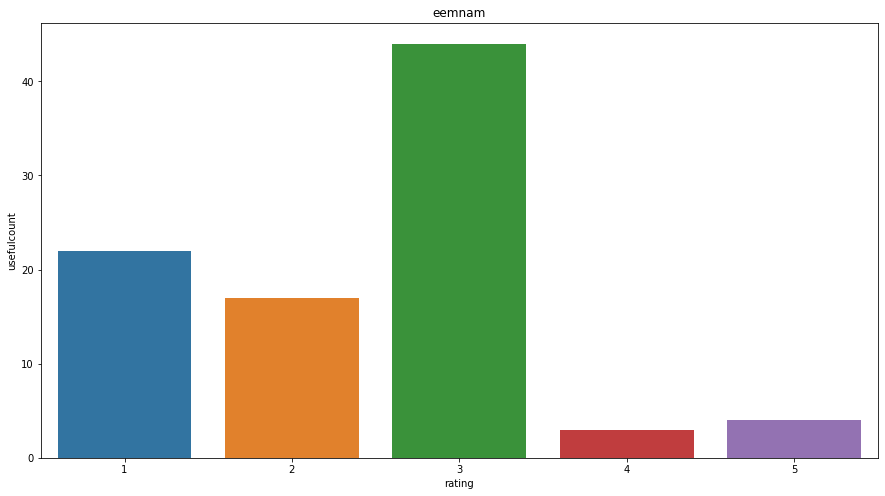

In [91]:
plt.figure(figsize=(15,8))
x = ["1","2","3","4","5"]
rating_plot = sns.barplot(x=x,y=usefulcount[0:5])
print(rating[0:5])
print(usefulcount[0:5])
rating_plot.set_title("eemnam")
rating_plot.set_xlabel("rating")
rating_plot.set_ylabel("usefulcount");
plt.show()

In [92]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,...,review_clean_without_removing_ss,sentiment_clean_without_removing_ss,word_count,unique_word_count,letters_count,count_punctuations,upper_words_count,title_words_count,stopwords_count,mean_word_length
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22,1.0,2012,2,...,ive tried a few antidepressants over the years...,0.000000,67,53,410,22,2,4,27,5.134328
1,206473,Mesalamine,"PTSD's Disease, Maintenance","""My son has PTSD&#039;s disease and has done v...",8,2009-05-17,17,1.0,2009,5,...,my son has ptsds disease and has done very wel...,0.566667,48,39,245,13,0,4,22,4.125000
2,97013,Ambien,Insomnia,"""Ditto on rebound sleepless when discontinued....",2,2015-01-13,44,0.0,2015,1,...,ditto on rebound sleepless when discontinued i...,-0.030000,41,37,237,6,2,6,19,4.804878
3,159672,Bactrim,Anxiety,"""Quick reduction of symptoms""",9,2017-09-29,3,1.0,2017,9,...,quick reduction of symptoms,0.333333,4,4,27,2,0,1,1,6.000000
4,97768,Cyclafem 1 / 35,Autism,"""I have been on this Autism for one cycle. Aft...",9,2015-10-22,4,1.0,2015,10,...,i have been on this autism for one cycle after...,0.234537,144,88,704,17,10,22,80,3.895833


In [100]:
grp = data.groupby('drugName')
print((grp.get_group('Bactrim')))

        uniqueID drugName                 condition   
3         159672  Bactrim                   Anxiety  \
63        159659  Bactrim         Kidney Infections   
1589      159917  Bactrim                      Acne   
1758      159766  Bactrim                      Acne   
1807      159727  Bactrim  Bacterial Skin Infection   
...          ...      ...                       ...   
157398    159819  Bactrim                      Acne   
158206    159845  Bactrim                      Acne   
158566    159903  Bactrim                   Anxiety   
159499    159662  Bactrim         Kidney Infections   
159674    159683  Bactrim                      Acne   

                                                   review  rating       date   
3                           "Quick reduction of symptoms"       9 2017-09-29  \
63      "I was prescribed Bactrim for a kidney infecti...       1 2017-12-06   
1589    "Bactrim cleared my skin up in less than a wee...      10 2014-08-01   
1758    "Many of us

In [101]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,...,review_clean_without_removing_ss,sentiment_clean_without_removing_ss,word_count,unique_word_count,letters_count,count_punctuations,upper_words_count,title_words_count,stopwords_count,mean_word_length
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22,1.0,2012,2,...,ive tried a few antidepressants over the years...,0.000000,67,53,410,22,2,4,27,5.134328
1,206473,Mesalamine,"PTSD's Disease, Maintenance","""My son has PTSD&#039;s disease and has done v...",8,2009-05-17,17,1.0,2009,5,...,my son has ptsds disease and has done very wel...,0.566667,48,39,245,13,0,4,22,4.125000
2,97013,Ambien,Insomnia,"""Ditto on rebound sleepless when discontinued....",2,2015-01-13,44,0.0,2015,1,...,ditto on rebound sleepless when discontinued i...,-0.030000,41,37,237,6,2,6,19,4.804878
3,159672,Bactrim,Anxiety,"""Quick reduction of symptoms""",9,2017-09-29,3,1.0,2017,9,...,quick reduction of symptoms,0.333333,4,4,27,2,0,1,1,6.000000
4,97768,Cyclafem 1 / 35,Autism,"""I have been on this Autism for one cycle. Aft...",9,2015-10-22,4,1.0,2015,10,...,i have been on this autism for one cycle after...,0.234537,144,88,704,17,10,22,80,3.895833


In [103]:
data.corr(method="pearson")

ValueError: could not convert string to float: 'Mirtazapine'

In [105]:
f = data['rating'] > 8
f

0          True
1         False
2         False
3          True
4          True
          ...  
159880     True
159881    False
159882    False
159883     True
159884     True
Name: rating, Length: 213350, dtype: bool

In [106]:
User_usage = pd.read_csv('user_usage.csv')
User_usage.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792
...,...,...,...,...
235,260.66,68.44,896.96,25008
236,97.12,36.50,2815.00,25040
237,355.93,12.37,6828.09,25046
238,632.06,120.46,1453.16,25058


In [108]:
user_device=pd.read_csv('user_device.csv')
user_device.head()

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1


In [109]:
android_device = pd.read_csv('android_devices.csv')
android_device.head()

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


In [110]:
pd.merge(User_usage,user_device,on='use_id')

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform,platform_version,device,use_type_id
0,21.97,4.82,1557.33,22787,12921,android,4.3,GT-I9505,1
1,1710.08,136.88,7267.55,22788,28714,android,6.0,SM-G930F,1
2,1710.08,136.88,7267.55,22789,28714,android,6.0,SM-G930F,1
3,94.46,35.17,519.12,22790,29592,android,5.1,D2303,1
4,71.59,79.26,1557.33,22792,28217,android,5.1,SM-G361F,1
...,...,...,...,...,...,...,...,...,...
154,198.59,90.49,5191.12,23043,28953,android,6.0,SM-G900F,1
155,198.59,90.49,3114.67,23044,28953,android,6.0,SM-G900F,1
156,106.65,82.13,5191.12,23046,29454,android,6.0,Moto G (4),1
157,344.53,20.53,519.12,23049,29725,android,6.0,SM-G900F,1


In [116]:
result = pd.merge(User_usage,user_device[['use_id','device']],on='use_id',how='inner')
result.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,device
0,21.97,4.82,1557.33,22787,GT-I9505
1,1710.08,136.88,7267.55,22788,SM-G930F
2,1710.08,136.88,7267.55,22789,SM-G930F
3,94.46,35.17,519.12,22790,D2303
4,71.59,79.26,1557.33,22792,SM-G361F


In [117]:
x = result.loc[result.device=='SM-G930F',"device"].value_counts()
x

device
SM-G930F    3
Name: count, dtype: int64

In [118]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,...,review_clean_without_removing_ss,sentiment_clean_without_removing_ss,word_count,unique_word_count,letters_count,count_punctuations,upper_words_count,title_words_count,stopwords_count,mean_word_length
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22,1.0,2012,2,...,ive tried a few antidepressants over the years...,0.000000,67,53,410,22,2,4,27,5.134328
1,206473,Mesalamine,"PTSD's Disease, Maintenance","""My son has PTSD&#039;s disease and has done v...",8,2009-05-17,17,1.0,2009,5,...,my son has ptsds disease and has done very wel...,0.566667,48,39,245,13,0,4,22,4.125000
2,97013,Ambien,Insomnia,"""Ditto on rebound sleepless when discontinued....",2,2015-01-13,44,0.0,2015,1,...,ditto on rebound sleepless when discontinued i...,-0.030000,41,37,237,6,2,6,19,4.804878
3,159672,Bactrim,Anxiety,"""Quick reduction of symptoms""",9,2017-09-29,3,1.0,2017,9,...,quick reduction of symptoms,0.333333,4,4,27,2,0,1,1,6.000000
4,97768,Cyclafem 1 / 35,Autism,"""I have been on this Autism for one cycle. Aft...",9,2015-10-22,4,1.0,2015,10,...,i have been on this autism for one cycle after...,0.234537,144,88,704,17,10,22,80,3.895833


In [125]:
data.groupby('rating')['usefulCount'].mean()

rating
1     15.729607
2     16.449422
3     16.229005
4     16.660701
5     17.303898
6     20.041204
7     23.329311
8     29.444579
9     33.942708
10    37.623559
Name: usefulCount, dtype: float64